# Working with Time Series Data: Exercises

In [151]:
import numpy as np
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns

## sf_temps

In [152]:
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [153]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [154]:
# Set date as index
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [155]:
#get the daily mean
df_daily = df.resample('D').mean()
df_daily.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


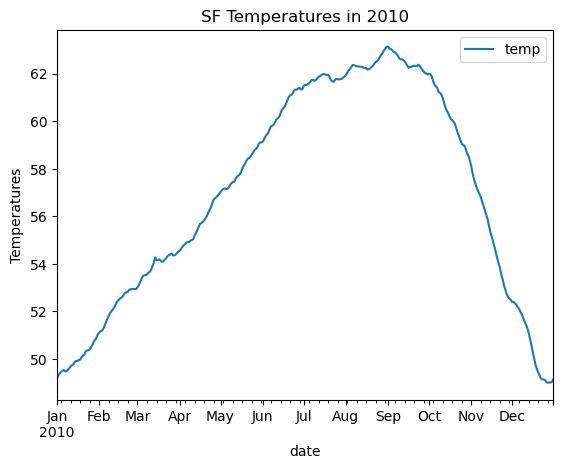

In [156]:
df_daily.plot()
plt.title('SF Temperatures in 2010')
plt.ylabel('Temperatures')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.


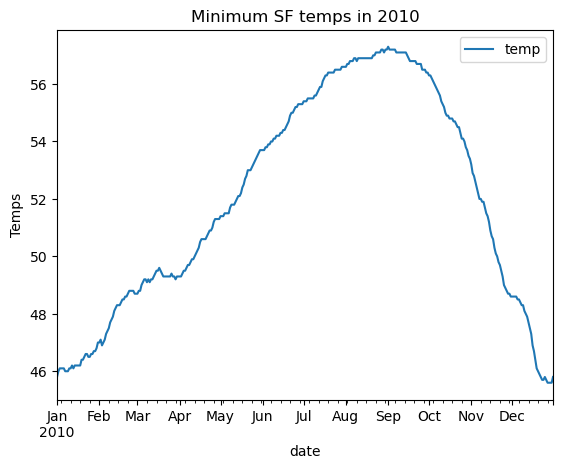

In [157]:
df.resample('D').min().plot()
plt.title('Minimum SF temps in 2010')
plt.ylabel('Temps')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.


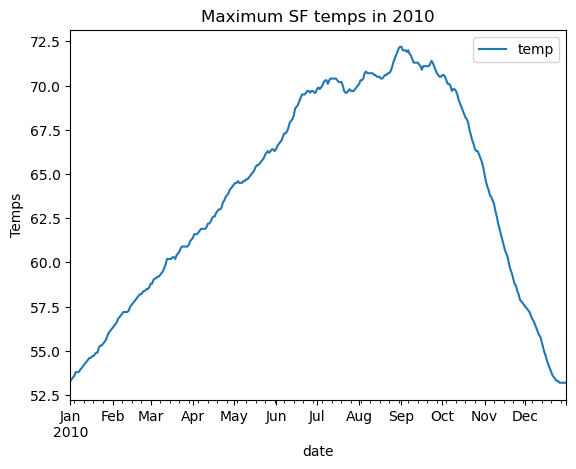

In [158]:
df.resample('D').max().plot()
plt.title('Maximum SF temps in 2010')
plt.ylabel('Temps')
plt.show()

### 4. Which month is the coldest, on average?
**ANSWER: JANUARY**

In [159]:
df_monthly = df.resample('M').mean()

In [160]:
df_monthly.sort_values('temp')

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


### 5. Which month has the highest average temperature?
**ANSWER: SEPTEMBER**

In [161]:
df_monthly.sort_values('temp', ascending=False)

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
**ANSWER: August**

In [162]:
df_daily = df.temp.resample('D').agg(['min','max'])

In [163]:
df_daily['min/max_difference'] = df_daily['max'] - df_daily['min']

In [164]:
df_monthly = df_daily.resample('M').max().sort_values('min/max_difference', ascending=False)
df_monthly

,min,max,min/max_difference
date,,,
2010-08-31,57.2,72.2,15.0
2010-09-30,57.3,72.2,14.9
2010-06-30,55.3,69.7,14.8
2010-07-31,56.6,70.4,14.8
2010-10-31,56.3,70.6,14.4
2010-05-31,53.7,66.4,13.1
2010-04-30,51.3,64.3,13.0
2010-03-31,49.6,61.3,12.0
2010-11-30,53.2,65.0,11.8


## seattle_weather

In [165]:
df = data.seattle_weather()
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

### 1. Which year and month combination has the highest amount of precipitation?
**ANSWER: December 2015**

In [166]:
# Set date as index
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [167]:
df.precipitation.resample('M').mean().sort_values(ascending=False)


date
2015-12-31    9.177419
2014-03-31    7.741935
2015-11-30    7.086667
2012-11-30    7.016667
2012-03-31    5.903226
2012-12-31    5.612903
2012-01-31    5.590323
2014-02-28    5.542857
2014-10-31    5.532258
2012-10-31    5.493548
2013-09-30    5.226667
2013-04-30    4.986667
2015-02-28    4.792857
2014-11-30    4.103333
2015-10-31    3.948387
2014-12-31    3.929032
2015-03-31    3.661290
2014-04-30    3.536667
2013-01-31    3.409677
2013-11-30    3.210000
2012-02-29    3.182759
2014-01-31    3.032258
2015-01-31    3.000000
2015-08-31    2.687097
2014-05-31    2.580645
2012-06-30    2.503333
2012-04-30    2.270000
2013-03-31    2.248387
2013-05-31    1.951613
2014-09-30    1.890000
2015-04-30    1.720000
2012-05-31    1.683871
2014-08-31    1.483871
2013-02-28    1.439286
2013-12-31    1.367742
2013-10-31    1.264516
2013-08-31    1.109677
2013-06-30    1.103333
2012-07-31    0.848387
2015-09-30    0.703333
2014-07-31    0.632258
2014-06-30    0.626667
2015-05-31    0.477419
2015-0

### 2. Visualize the amount of monthly precipitation over time.


In [138]:
df_monthly = df.drop(columns=['weather'])
df_monthly = df_monthly.resample('M').mean()

<Axes: xlabel='date'>

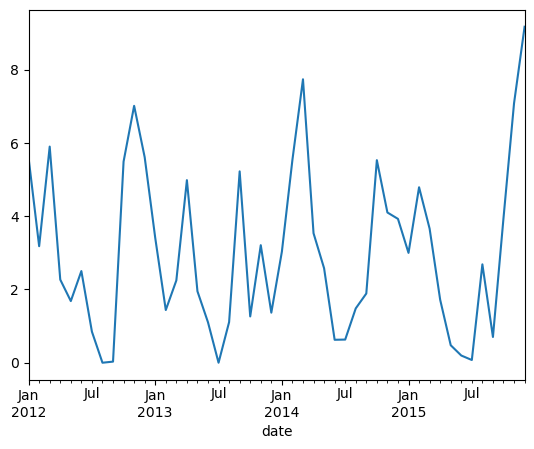

In [139]:
df_monthly.precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<Axes: xlabel='date'>

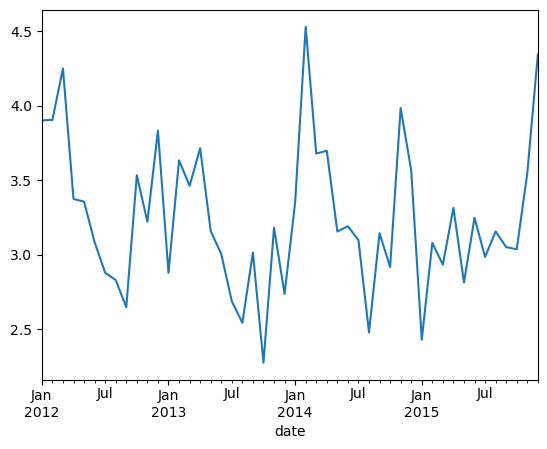

In [140]:
df_monthly.wind.plot()

### 4. Which year-month combination is the windiest?
**ANSWER: December 2012**

In [142]:
df[df.wind == df.wind.max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-17,2.0,8.3,1.7,9.5,rain


### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
**ANSWER: 2014**

In [24]:
# Filter rows where 'weather' is 'sun'
sunny_days = df[df['weather'] == 'sun'].copy()  

# Extract the year from the index (DatetimeIndex)
sunny_days['year'] = sunny_days.index.year

# Group by year and count the number of sunny days per year
sunny_days_by_year = sunny_days.groupby('year').size()

# Find the year with the highest count (most sunny days)
sunniest_year = sunny_days_by_year.idxmax()
sunniest_year

2014

### 6. In which month does it rain the most?
**ANSWER: February**

In [149]:
# Filter rows where 'weather' is 'sun'
rainy_days = df[df['weather'] == 'rain'].copy()  

# Extract the year from the index (DatetimeIndex)
rainy_days['month'] = rainy_days.index.month

# Group by year and count the number of sunny days per year
raint_days_by_month = rainy_days.groupby('month').size()

# Find the year with the highest count (most sunny days)
rainiest_month = raint_days_by_month.idxmax()
rainiest_month

2

### 7. Which month has the most number of days with a non-zero amount of precipitation?
**ANSWER: DECEMBER**

In [26]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
rainy_days = df[df['precipitation'] != 0].copy()  

# Extract the year from the index (DatetimeIndex)
rainy_days['month'] = rainy_days.index.month

# Group by year and count the number of sunny days per year
raint_days_by_month = rainy_days.groupby('month').size()

# Find the year with the highest count (most sunny days)
rainiest_month = raint_days_by_month.idxmax()
rainiest_month

12

## FLIGHTS_20K

In [28]:
df = data.flights_20k()
df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [29]:
df = df.set_index('date')
df = df.sort_index()

### 1. Convert any negative delays to 0.


In [30]:
df['delay'] = df['delay'].apply(lambda x: max(x, 0))

### 2. Which hour of the day has the highest average delay?
**ANSWER: 03:00**

In [31]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [32]:
df['hour'] = df.index.hour

In [33]:
df.groupby('hour').delay.mean().sort_values(ascending=False)

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
21     21.626768
20     17.889778
19     16.256557
18     14.514218
16     13.881068
17     13.199580
15     13.137592
13     11.453311
14     10.747320
12      9.214341
11      7.361495
10      5.850953
9       5.002504
8       4.030483
7       3.071932
6       2.494856
5       0.513514
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?
**ANSWER: Yes. Fridays avg delay 0f 17.7 is more than double monday's avg of 7.1**

In [34]:
df['weekday'] = df.index.day_name()

In [35]:
df.groupby('weekday').delay.mean().sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?
**ANSWER: Yes. February has the highest delay in the dataset with avg of 12.3 and March has the lowest with av of 9.8**

In [36]:
df['month'] = df.index.month_name()

In [38]:
df.groupby('month').delay.mean().sort_values()

month
March        9.875287
January     11.301592
February    12.306106
Name: delay, dtype: float64